# Quantium data project

In [5]:
pip install openpyxl

     |████████████████████████████████| 250 kB 528 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Transaction data 

In [103]:
df = pd.read_excel(r'/Users/nurpeissova/Downloads/QVI_transaction_data.xlsx')
print(df)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

### Checking whether all columns are with correct data types.
We see that date column is integer, we should convert it to date format.
Now i'm creating a new dataframe with one column including date from our dataframe (converted from integer to date format, knowing that int format starts from 1899 december 30)

In [ ]:
temp=pd.DataFrame(columns=['DATE'])

for row in df['DATE']:
    data= pd.to_datetime(datetime(1899,12,30) + timedelta(row)).strftime("%Y-%m-%d")
    
    temp = temp.append({"DATE":data}, ignore_index=True)

#### Updating our Date column 

In [140]:
df['DATE']=temp['DATE']
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [143]:
df['DATE']=pd.to_datetime(df["DATE"], format="%Y/%m/%d")

In [144]:
df.dtypes #now it's date format

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

### Missing /checking values
#### Null values

In [145]:
for col in df.columns:
    missing_values = np.mean (df[col].isnull())
    print('{}-{}%'.format(col,missing_values))

DATE-0.0%
STORE_NBR-0.0%
LYLTY_CARD_NBR-0.0%
TXN_ID-0.0%
PROD_NBR-0.0%
PROD_NAME-0.0%
PROD_QTY-0.0%
TOT_SALES-0.0%


All percents are 0, so we do not have missing values

#### Unwanted data
Now we examine product if there are products except chips.
We see there is salsa

In [150]:
print(df["PROD_NAME"].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [160]:
df = df[ df[ 'PROD_NAME' ].str.contains( "Salsa" )==False]

In [181]:
df= df.astype({'PROD_NAME':'string'})

In [183]:
df['PROD_NAME'] = df['PROD_NAME'].str.replace('&','')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('/','')

### Examining products
#### - brand name and package size

I started to examine all products name and figured that there are some mistakes.
I replaced some values so we have unique brands names without mistakes

In [544]:
df.loc[df['PROD_NBR'] == 4, 'PROD_NAME'] = "Doritos Corn Chp Supreme 380g"
df.loc[df['PROD_NBR'] == 105, 'PROD_NAME'] = "WW Cheese Rings 190g"
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Red Rock Deli','RRD')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Infzns','RRDnfuzions')
df.loc[df['PROD_NBR'] == 82, 'PROD_NAME'] = "Smiths Crinkle Cut Mac N Cheese 150g"
df.loc[df['PROD_NBR'] == 43, 'PROD_NAME'] = "Smiths Crinkle Cut Bolognese 150g"
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Snbts','Sunbites')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Grain Waves','Grain_Waves')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('GrnWves','Grain_Waves')
df.loc[df['PROD_NBR'] == 5, 'PROD_NAME'] = "NCC SeaSalt 175g"
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Natural Chip Compny','NCC')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Natural ChipCo','NCC')
df['PROD_NAME'] = df['PROD_NAME'].str.replace('Natural Chip Co','NCC')

In [547]:
df['SIZE']=df['PROD_NAME'].str[-4:] #making size column
df['SIZE'] = df['SIZE'].str.replace('g','')

In [551]:
df['BRAND']=df['PROD_NAME'].str.split(' ').str[0]

In [554]:
df['PROD_NAME']=df['PROD_NAME'].str[0:-4]

In [592]:
del df['PROD_NAME']

In [630]:
df_brand= pd.DataFrame(columns=['BRAND','FREQ','TOT_QTY','TOT_SALES'])

In [631]:
df_brand['BRAND']=df['BRAND']
df_brand['TOT_QTY']=df.groupby('BRAND')['PROD_QTY'].transform('sum')
df_brand['TOT_SALES']=df.groupby('BRAND')['TOT_SALES'].transform('sum')
df_brand['FREQ']=df.groupby('BRAND')['BRAND'].transform('count')

In [635]:
df_brand=df_brand.drop_duplicates()

In [636]:
df_brand_sorted=df_brand.sort_values('FREQ', ascending=False)
df_brand_sorted.head(2)

,BRAND,FREQ,TOT_QTY,TOT_SALES
4,Kettle,41288,79051,390239.8
2,Smiths,30353,57582,217492.0


In [637]:
df_brand_sorted2=df_brand.sort_values('TOT_SALES', ascending=False)
df_brand_sorted2.head(2)

,BRAND,FREQ,TOT_QTY,TOT_SALES
4,Kettle,41288,79051,390239.8
8,Doritos,25226,48731,227629.9


Top two that drequent bought are Kettle, Smiths and plus Doritos cause of his price it is on the second place by sales

#### Maximum values 
Now we see the maximum amount of chips that customers buy at once

In [648]:
df[df['PROD_QTY'] == df['PROD_QTY'].max()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,SIZE,BRAND
69762,2018-08-19,226,226000,226201,4,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,200,650.0,380,Doritos


Once a year that customer bought 200 chips at once.
let'see his other purchases

In [242]:
df[df.LYLTY_CARD_NBR == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


so this customer twice bought chips of prod_number of 4 with amount of 200 piesces at once. That's weird, he is making a party or buying it for re-sale. There is need to make analysis of this customer, whether there is possibility to make him a distributor of our products. 

### Summary of Sales Frequency

In [217]:
df_occurence = pd.DataFrame(columns = ['PROD_NBR', 'PROD_NAME','FREQ','TOT_QTY','TOT_SALE'])
df_occurence.head()

,PROD_NBR,PROD_NAME,FREQ,TOT_QTY,TOT_SALE


In [218]:
df_occurence['PROD_NBR'] = df['PROD_NBR'].unique()
df_occurence['PROD_NAME']=df['PROD_NAME'].unique() 

In [224]:
df_occurence['FREQ']= df.groupby('PROD_NBR')['PROD_NAME'].transform('count')
df_occurence['TOT_QTY']=df.groupby('PROD_NBR')['PROD_QTY'].transform('sum')
df_occurence['TOT_SALE']=df.groupby('PROD_NBR')['TOT_SALES'].transform('sum')
df_occurence.head()


,PROD_NBR,PROD_NAME,FREQ,TOT_QTY,TOT_SALE
0,5,Natural Chip Compny SeaSalt175g,1468.0,2777.0,8331.0
1,66,CCs Nacho Cheese 175g,1498.0,2839.0,5961.9
2,61,Smiths Crinkle Cut Chips Chicken 170g,1484.0,2823.0,8183.8
3,69,Smiths Chip Thinly SCream Onion 175g,1473.0,2771.0,8313.0
4,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3296.0,6309.0,29021.4


In [232]:
df_sorted_freq = df_occurence.sort_values('FREQ', ascending = False)
df_sorted_qty = df_occurence.sort_values('TOT_QTY', ascending = False)
df_sorted_sales=df_occurence.sort_values('TOT_SALE', ascending = False)

In [233]:
df_sorted_freq.head(7)

,PROD_NBR,PROD_NAME,FREQ,TOT_QTY,TOT_SALE
45,70,Tyrrells Crisps Lightly Salted 165g,3304.0,6381.0,34457.4
24,99,Pringles Sthrn FriedChicken 134g,3296.0,6309.0,29021.4
4,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3296.0,6309.0,29021.4
58,81,Pringles Original Crisps 134g,3296.0,6309.0,29021.4
98,21,WW Sour Cream OnionStacked Chips 160g,3269.0,6256.0,23772.8
73,1,Smiths Crinkle Cut Chips Barbecue 170g,3269.0,6256.0,23772.8
81,90,Tostitos Smoked Chipotle 175g,3265.0,6277.0,23852.6


In [235]:
df_sorted_sales.head(7)

,PROD_NBR,PROD_NAME,FREQ,TOT_QTY,TOT_SALE
67,68,Pringles Chicken Salt Crips 134g,3185.0,6509.0,40352.0
41,40,Thins Chips Seasonedchicken 175g,3185.0,6509.0,40352.0
101,58,Red Rock Deli Chikn Garlic Aioli 150g,3233.0,6164.0,36367.6
10,15,Twisties Cheese 270g,3197.0,6106.0,34804.2
6,24,Grain Waves Sweet Chilli 210g,3197.0,6106.0,34804.2
45,70,Tyrrells Crisps Lightly Salted 165g,3304.0,6381.0,34457.4
72,78,Thins Chips Salt Vinegar 175g,3142.0,6018.0,34302.6


We see that Tyrrels Crisps were saled frequently with total sales a little under 35K that is 6 place at big sales. Other frequent bought products make under 30k sales. 

### Summary by customers

In [275]:
df_customers =pd.DataFrame(columns=['LYLTY_CARD_NBR', 'FREQ_PURC','TOT_SALE'])
df_customers['LYLTY_CARD_NBR']=df['LYLTY_CARD_NBR']

In [277]:
df_customers['FREQ_PURC']=df.groupby('LYLTY_CARD_NBR')['LYLTY_CARD_NBR'].transform('count')

In [279]:
df_customers['TOT_SALE']=df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].transform('sum')

In [297]:
df_customers=df_customers.drop_duplicates()

In [299]:
df_customer_sort = df_customers.sort_values('TOT_SALE', ascending = False)
df_customer_sort.head()

,LYLTY_CARD_NBR,FREQ_PURC,TOT_SALE
69762,226000,2,1300.0
32775,230078,17,138.6
189027,58361,14,124.8
32241,63197,14,122.6
64213,162039,17,121.6


After the customer that buys 200 chips at once:) we have our top customer with loyalty number of 230078, he/she buys more and frequently.

### Summary by date

In [432]:
df_date = pd.DataFrame(columns=['DATE', 'TOT_SALE'])
df_date['DATE']=df['DATE']

In [433]:
df_date['TOT_SALE']=df.groupby('DATE')['TOT_SALES'].transform('sum')

In [436]:
df_date=df_date.drop_duplicates()

In [649]:
print(df_date.count()) #missing one day

DATE        364
TOT_SALE    364
dtype: int64


In [330]:
print(pd.date_range(start="2018-07-01", end="2019-06-30").difference(df_date.index))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


#### The 25th of December is Christmas day, noone bought any chips

In [438]:
df_date=df_date.sort_values('DATE',ascending=True)

In [463]:
df_date_month=df_date

In [466]:
df_date_month['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%Y-%m')

In [469]:
df_date_month_temp = pd.DataFrame(columns=['DATE', 'SALES'])

In [470]:
df_date_month_temp['DATE']=df_date_month['DATE']

In [471]:
df_date_month_temp['SALES'] = df_date_month.groupby('DATE')['TOT_SALE'].transform('sum')

In [474]:
df_date_month = df_date_month_temp.drop_duplicates()

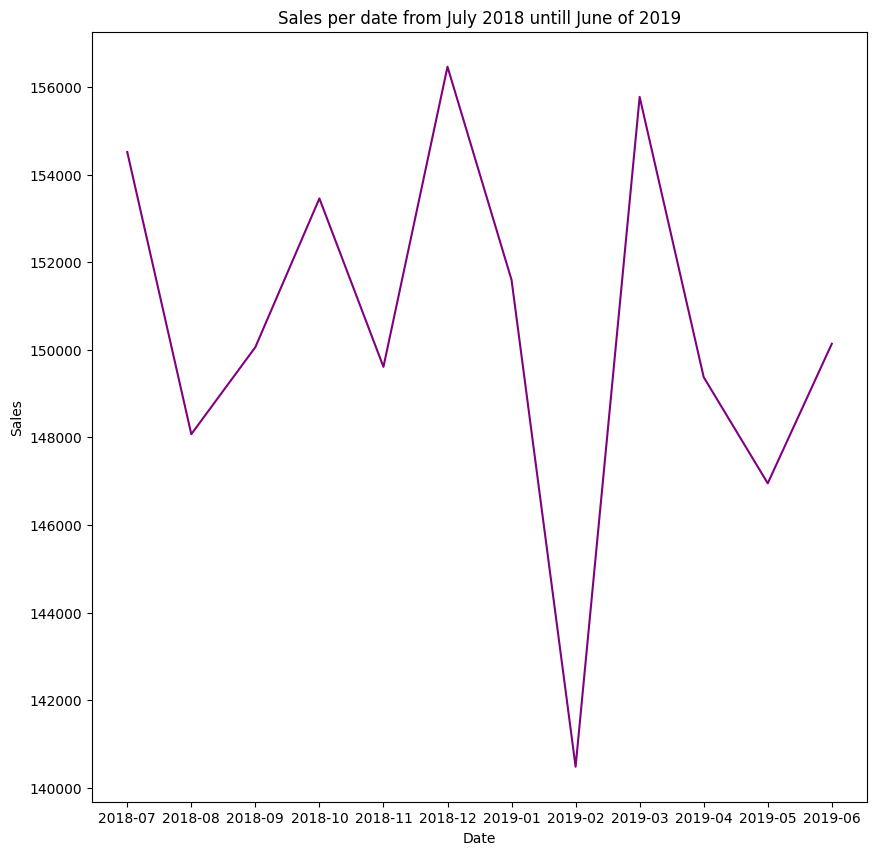

In [475]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(df_date_month['DATE'],
        df_date_month['SALES'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="Sales",
       title="Sales per date from July 2018 untill June of 2019")


plt.show()

#### We see that in December there is a big increase due to Christmas days and New Year holidays. But then untill february there was a breakdown, so after Christmas.

## Customer data

In [652]:
df_temp = pd.read_excel(r'/Users/nurpeissova/Downloads/Purchase behaviour.xlsx')

In [664]:
df_customer= df_temp['LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER'].str.split(',', expand=True)

In [665]:
df_customer.columns =['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']

### Checking data types and changing it

In [667]:
df_customer.dtypes

LYLTY_CARD_NBR      object
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [668]:
df_customer['LYLTY_CARD_NBR']=df_customer['LYLTY_CARD_NBR'].astype('int64')
df_customer['LIFESTAGE']=df_customer['LIFESTAGE'].astype('string')
df_customer['PREMIUM_CUSTOMER']=df_customer['PREMIUM_CUSTOMER'].astype('string')

In [669]:
df_customer.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           string
PREMIUM_CUSTOMER    string
dtype: object

### Summary of customers, how many there are premium , family-person customers

In [675]:
df_lifestage = pd.DataFrame(columns=['LIFESTAGE', 'TOT_NBR'])
df_lifestage['LIFESTAGE']=df_customer['LIFESTAGE']
df_lifestage['TOT_NBR']=df_customer.groupby('LIFESTAGE')['LIFESTAGE'].transform('count')
df_lifestage=df_lifestage.drop_duplicates()
df_lifestage=df_lifestage.sort_values('TOT_NBR', ascending=False)
df_lifestage

,LIFESTAGE,TOT_NBR
10,RETIREES,14805
3,OLDER SINGLES/COUPLES,14609
0,YOUNG SINGLES/COUPLES,14441
9,OLDER FAMILIES,9780
2,YOUNG FAMILIES,9178
4,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


What we see that the maximum amount of customers are retirees and the minimum ones are new families

In [681]:
df_premium = pd.DataFrame(columns=['PREMIUM', 'TOT_NBR'])
df_premium['PREMIUM']=df_customer['PREMIUM_CUSTOMER']
df_premium['TOT_NBR']=df_customer.groupby('PREMIUM_CUSTOMER')['PREMIUM_CUSTOMER'].transform('count')
df_premium=df_premium.drop_duplicates()
df_premium=df_premium.sort_values('TOT_NBR', ascending=False)
df_premium['PERCENT']=((df_premium['TOT_NBR']/df_premium['TOT_NBR'].sum())*100).round(2)
df_premium

,PREMIUM,TOT_NBR,PERCENT
1,Mainstream,29245,40.26
2,Budget,24470,33.69
0,Premium,18922,26.05


Mainstream dominates, Budget is the one third of total and Premium customers are less

## Merging two data: transaction and customer

#### Merging process

In [684]:
df_result = pd.merge(df, df_customer, on=["LYLTY_CARD_NBR", "LYLTY_CARD_NBR"])

In [686]:
df_result.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget


#### Missing values

In [687]:
for col in df_result.columns:
    missing_values = np.mean (df_result[col].isnull())
    print('{}-{}%'.format(col,missing_values))

DATE-0.0%
STORE_NBR-0.0%
LYLTY_CARD_NBR-0.0%
TXN_ID-0.0%
PROD_NBR-0.0%
PROD_QTY-0.0%
TOT_SALES-0.0%
SIZE-0.0%
BRAND-0.0%
LIFESTAGE-0.0%
PREMIUM_CUSTOMER-0.0%


Good sign! that we do not have missing values and everything is merged

### Analysis of customers

#### Customers by lifestage

In [702]:
df_result = df_result.drop_duplicates()

In [692]:
df_result.head(1)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium


In [709]:
df_lifestage_res = pd.DataFrame(columns=['LIFESTAGE', 'TOT_NBR', 'TOT_QTY','TOT_SALES' ])

In [710]:
df_lifestage_res['LIFESTAGE']=df_result['LIFESTAGE'].astype('string')

In [712]:
df_lifestage_res['TOT_NBR']=df_result.groupby('LIFESTAGE')['LIFESTAGE'].transform('count')

In [714]:
df_lifestage_res['TOT_QTY']=df_result.groupby('LIFESTAGE')['PROD_QTY'].transform('sum')

In [716]:
df_lifestage_res['TOT_SALES']=df_result.groupby('LIFESTAGE')['TOT_SALES'].transform('sum')

In [718]:
df_lifestage_res = df_lifestage_res.drop_duplicates()

In [724]:
df_lifestage_res = df_lifestage_res.sort_values('TOT_SALES',ascending =False)
df_lifestage_res['PERCENT of QTY']=((df_lifestage_res['TOT_QTY']/df_lifestage_res['TOT_QTY'].sum())*100).round(2)
df_lifestage_res

,LIFESTAGE,TOT_NBR,TOT_QTY,TOT_SALES,PERCENT,PERCENT of QTY
75056,OLDER SINGLES/COUPLES,50792,97183,376013.65,20.64,20.64
125849,RETIREES,46431,87875,342381.90,18.67,18.67
29896,OLDER FAMILIES,45160,88296,329819.90,18.75,18.75
172280,YOUNG FAMILIES,40494,78577,294627.90,16.69,16.69
0,YOUNG SINGLES/COUPLES,33969,62300,243756.60,13.23,13.23
1,MIDAGE SINGLES/COUPLES,23398,44496,172523.80,9.45,9.45
23399,NEW FAMILIES,6497,12070,47347.95,2.56,2.56


* TOT_NBR is number of customer per this segment
* TOT_QTY is how many chips were bought
* TOT_SALES is sales in total
* PERCENT is percentage of quantity bought by lifestage to the total number of chips bought

Older singles/couples make more sales and this segment buys more than 20% of total products quantity. They buy more chips than any other segment.
Only older customers (if take them as one segment: Older singles, retirees, older families,) that segment purchases more than 58 % of products. 
The question is why older people tend to buy chips

#### Customers by premium purchasings

In [726]:
df_premium_res= pd.DataFrame(columns=['PREMIUM', 'TOT_QTY', 'TOT_SALES'])

In [728]:
df_premium_res['PREMIUM']=df_result['PREMIUM_CUSTOMER'].astype('string')

In [730]:
df_premium_res['TOT_QTY'] =df_result.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].transform('sum')

In [731]:
df_premium_res['TOT_SALES'] =df_result.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].transform('sum')

In [734]:
df_premium_res=df_premium_res.drop_duplicates()

In [735]:
df_premium_res=df_premium_res.sort_values('TOT_SALES', ascending=False)

In [737]:
df_premium_res['PERCENT of SALES']=((df_premium_res['TOT_SALES']/df_premium_res['TOT_SALES'].sum())*100).round(2)
df_premium_res['PERCENT of QTY']=((df_premium_res['TOT_QTY']/df_premium_res['TOT_QTY'].sum())*100).round(2)
df_premium_res

,PREMIUM,TOT_QTY,TOT_SALES,PERCENT of SALES,PERCENT of QTY
4692,Mainstream,180780,700865.40,38.80,38.40
1,Budget,165774,631406.85,34.95,35.21
0,Premium,124243,474199.45,26.25,26.39


Mainstream is making more sales buying more chips 38.4% of total quantity. And the number of customers is the biggest among all. 
Budget is an average customer making average sales and about 35%. And amount of chips that was bought by this segment is 35.21%
And Premium is less in all parameters among others.

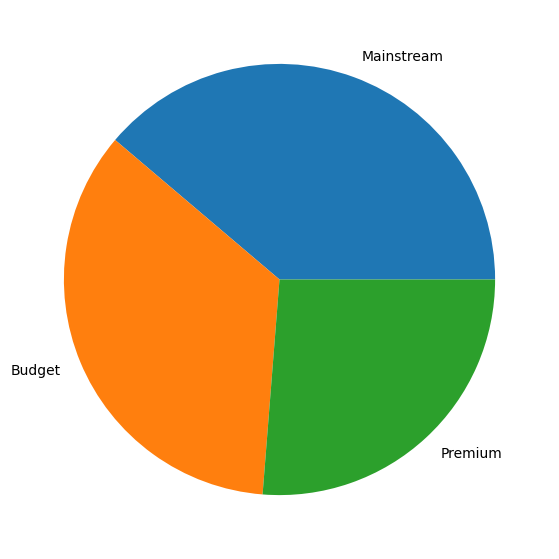

In [770]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_premium_res['TOT_SALES'], labels = df_premium_res['PREMIUM'])
 
plt.show()

### Two dimension analysis

In [747]:
df_two_dim = pd.DataFrame(columns=['PREMIUM', 'LIFESTAGE', 'TOT_QTY', 'TOT_SALES'])

In [748]:
df_two_dim['PREMIUM']=df_result['PREMIUM_CUSTOMER']
df_two_dim['LIFESTAGE']=df_result['LIFESTAGE']

In [750]:
df_two_dim['TOT_QTY']=df_result.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['PROD_QTY'].transform('sum')

In [751]:
df_two_dim['TOT_SALES']=df_result.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'])['TOT_SALES'].transform('sum')

In [752]:
df_two_dim=df_two_dim.drop_duplicates()

In [757]:
df_two_dim.sort_values(['PREMIUM','TOT_SALES'], ascending= False)

,PREMIUM,LIFESTAGE,TOT_QTY,TOT_SALES
109289,Premium,OLDER SINGLES/COUPLES,31693,123531.55
160044,Premium,RETIREES,23266,91296.65
201990,Premium,YOUNG FAMILIES,20901,78571.70
64651,Premium,OLDER FAMILIES,20639,76542.60
15787,Premium,MIDAGE SINGLES/COUPLES,14400,54443.85
0,Premium,YOUNG SINGLES/COUPLES,10575,39052.30
28408,Premium,NEW FAMILIES,2769,10760.80
221347,Mainstream,YOUNG SINGLES/COUPLES,36225,147582.20
140074,Mainstream,RETIREES,37677,145168.95
92228,Mainstream,OLDER SINGLES/COUPLES,32607,124648.50


Through Premium segment older singles buy more chips.
Looking at Mainstream Young and retirees make more purchases.
On Budget Older Families.